# Analyzing Seasonal Staffing Trends

### Question to Answer
- How can Clipboard Health adjust its sales strategy based on seasonal or quarterly staffing trends to optimize its service offerings?

### Objective
- To recommend a strategy for Clipboard Health to adjust its sales focus based on seasonal staffing trends

### Methodology

- Aggregate Staffing Data by Quarter
- Identify Seasonal Patterns
- Visualize Seasonal Trends
- Analyze Competitive Landscape
- Develop Sales Strategy

#### Importing Libraries and Loading Dataset

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


# Load the cleaned PBJ dataset
df_cleaned = pd.read_csv('C:/Users/hp/Downloads/Cleaned_PBJ_Daily_Nurse_Staffing_Q1_2024.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_6960\1311619139.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('C:/Users/hp/Downloads/Cleaned_PBJ_Daily_Nurse_Staffing_Q1_2024.csv')


#### Aggregate Staffing Data by Quarter

In [11]:
# Calculate total hours (including employees and contractors)
df_cleaned['Total_Staffing_Hours'] = (
    df_cleaned['Hrs_RN'] + df_cleaned['Hrs_LPN'] + df_cleaned['Hrs_CNA'] +
    df_cleaned['Hrs_RNDON'] + df_cleaned['Hrs_RNadmin'] + 
    df_cleaned['Hrs_LPNadmin'] + df_cleaned['Hrs_NAtrn'] + 
    df_cleaned['Hrs_MedAide']
)

# Calculate total contractor hours
df_cleaned['Total_Contractor_Hours'] = (
    df_cleaned['Hrs_RN_ctr'] + df_cleaned['Hrs_LPN_ctr'] + df_cleaned['Hrs_CNA_ctr'] +
    df_cleaned['Hrs_RNDON_ctr'] + df_cleaned['Hrs_RNadmin_ctr'] + 
    df_cleaned['Hrs_LPNadmin_ctr'] + df_cleaned['Hrs_NAtrn_ctr'] + 
    df_cleaned['Hrs_MedAide_ctr']
)

# Define Staffing Columns correctly as a list of columns to aggregate
staffing_columns = ['Total_Staffing_Hours', 'Total_Contractor_Hours']

# Group by CY_Qtr and calculate total/average staffing
staffing_by_quarter = df_cleaned.groupby('CY_Qtr')[staffing_columns].agg(['sum', 'mean'])

Total_Staffing_Hours             Total_Contractor_Hours           
                        sum        mean                    sum       mean
CY_Qtr                                                                   
2024Q1         4.082262e+08  306.714238            30756307.15  23.108259

#### Identify Seasonal Patterns and Visualize Seasonal Trends

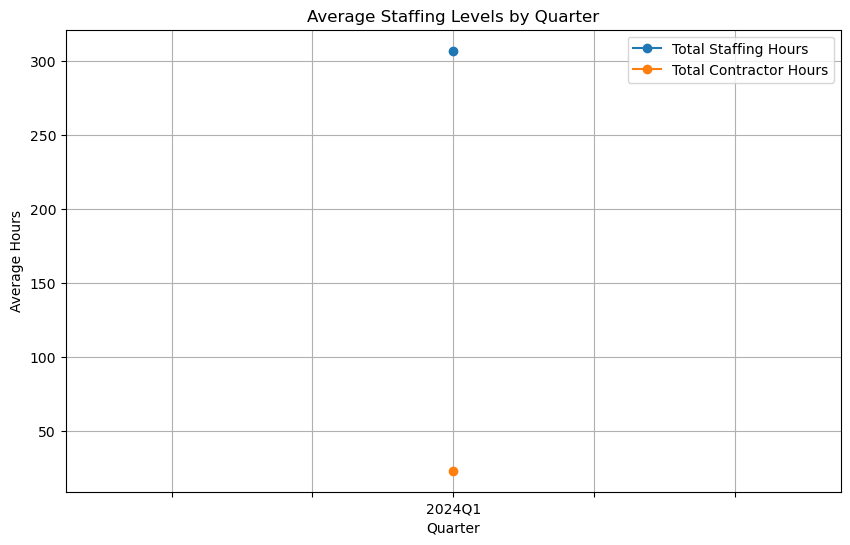

In [14]:
# Calculate mean staffing levels by quarter
mean_staffing_by_quarter = df_cleaned.groupby('CY_Qtr')[['Total_Staffing_Hours', 'Total_Contractor_Hours']].mean()

# Plot the trends
mean_staffing_by_quarter.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Average Staffing Levels by Quarter')
plt.ylabel('Average Hours')
plt.xlabel('Quarter')
plt.legend(['Total Staffing Hours', 'Total Contractor Hours'])
plt.grid(True)
plt.show()

#### Analyze Competitive Landscape

In [17]:
# Compare Competitor Staffing Levels Seasonally
# Group by competitor and quarter, calculate total staffing levels
competitor_staffing = df_cleaned.groupby(['PROVNAME', 'CY_Qtr'])[['Total_Staffing_Hours', 'Total_Contractor_Hours']].sum()

# Reset index for easier handling
competitor_staffing = competitor_staffing.reset_index()

# Identify Seasonal Low Points for Competitors
# Sort staffing data to find low staffing quarters for each competitor
low_staffing_periods = competitor_staffing.groupby('PROVNAME')[['CY_Qtr', 'Total_Staffing_Hours']].min()

,CY_Qtr,Total_Staffing_Hours
PROVNAME,,
15 CRAIGSIDE,2024Q1,19621.15
24TH PLACE,2024Q1,16951.92
60 WEST,2024Q1,35797.44
A GRACE SUB ACUTE & SKILLED CARE,2024Q1,31641.25
A HOLLY PATTERSON EXTENDED CARE FACILITY,2024Q1,137559.45
...,...,...
ZEBULON REHABILITATION CENTER,2024Q1,17285.75
"ZERBE SISTERS NURSING CENTER,",2024Q1,29325.78
ZIONSVILLE MEADOWS,2024Q1,21331.67


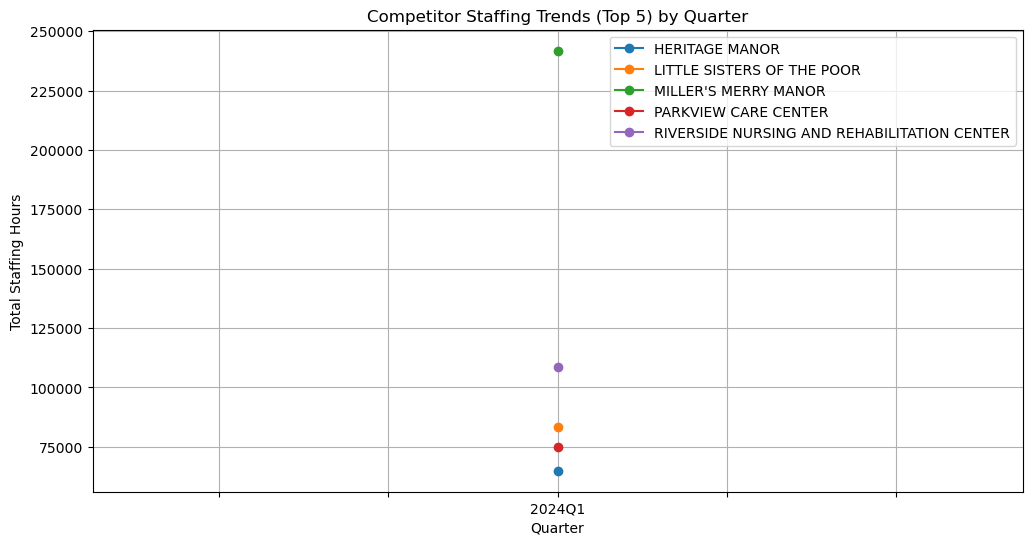

In [20]:
# Limit to top 5 competitors
top_competitors = df_cleaned['PROVNAME'].value_counts().head(5).index
filtered_data = df_cleaned[df_cleaned['PROVNAME'].isin(top_competitors)]

# Group the filtered data
competitor_staffing_filtered = filtered_data.groupby(['PROVNAME', 'CY_Qtr'])[['Total_Staffing_Hours', 'Total_Contractor_Hours']].sum().reset_index()

# Plot the filtered data
pivot_data_filtered = competitor_staffing_filtered.pivot(index='CY_Qtr', columns='PROVNAME', values='Total_Staffing_Hours')
pivot_data_filtered.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Competitor Staffing Trends (Top 5) by Quarter')
plt.ylabel('Total Staffing Hours')
plt.xlabel('Quarter')
plt.grid(True)
plt.legend(loc='best')
plt.show()
